In [2]:
import pandas as pd
import numpy as np
import pickle
import sklearn as sk
from sklearn import svm
import sklearn.neighbors
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import preprocessing from sklearn
from sklearn import preprocessing

# Feature Scaling
from sklearn.preprocessing import StandardScaler

%config IPCompleter.greedy=True
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

In [3]:
#columns = ['TimeStamp','LOCAL DATE','LOCAL TIME','LATITUDE','N/S','LONGITUDE','E/W','ALTITUDE','SPEED','HEADING','axis1','axis2','axis3','steps','lux','inclineOff','inclineStanding','inclineSitting','inclineLying','vm']
df = pd.read_csv('combineDataUTC.csv')
df = df.dropna()
df = df.replace({';':''}, regex=True)
df.dropna(axis=0, how='any', inplace=True)
df.head()



,Activity,TimeStamp,UnixTime,LATITUDE,N/S,LONGITUDE,E/W,ALTITUDE,SPEED,HEADING,axis1,axis2,axis3,steps,lux,inclineOff,inclineStanding,inclineSitting,inclineLying,vm
0,Walking,1/19/2018 11:49,1516391370,47.658951,N,-117.405619,W,150.020905,0.511703,350.754628,16,63,47,2,0,0,5,5,0,81
1,Walking,1/19/2018 11:49,1516391380,47.661562,N,-117.406250,W,554.857056,0.362232,150.871007,0,48,21,0,0,0,5,5,0,53
2,Walking,1/19/2018 11:49,1516391390,47.661484,N,-117.406185,W,554.637207,0.481599,135.057770,0,17,31,0,0,0,10,0,0,36
3,Walking,1/19/2018 11:50,1516391400,47.661468,N,-117.406162,W,556.567566,0.626974,38.221800,0,87,14,0,0,0,10,0,0,89
4,Walking,1/19/2018 11:50,1516391410,47.661479,N,-117.406149,W,556.621094,0.633758,129.348915,10,149,98,2,0,0,8,2,0,179


In [4]:
df.drop(["TimeStamp"], axis = 1, inplace = True) 
df.drop(["N/S"], axis = 1, inplace = True) 
df.drop(["E/W"], axis = 1, inplace = True) 

df.head()

,Activity,UnixTime,LATITUDE,LONGITUDE,ALTITUDE,SPEED,HEADING,axis1,axis2,axis3,steps,lux,inclineOff,inclineStanding,inclineSitting,inclineLying,vm
0,Walking,1516391370,47.658951,-117.405619,150.020905,0.511703,350.754628,16,63,47,2,0,0,5,5,0,81
1,Walking,1516391380,47.661562,-117.406250,554.857056,0.362232,150.871007,0,48,21,0,0,0,5,5,0,53
2,Walking,1516391390,47.661484,-117.406185,554.637207,0.481599,135.057770,0,17,31,0,0,0,10,0,0,36
3,Walking,1516391400,47.661468,-117.406162,556.567566,0.626974,38.221800,0,87,14,0,0,0,10,0,0,89
4,Walking,1516391410,47.661479,-117.406149,556.621094,0.633758,129.348915,10,149,98,2,0,0,8,2,0,179


In [5]:
df.dtypes

Activity            object
UnixTime             int64
LATITUDE           float64
LONGITUDE          float64
ALTITUDE           float64
SPEED              float64
HEADING            float64
axis1                int64
axis2                int64
axis3                int64
steps                int64
lux                  int64
inclineOff           int64
inclineStanding      int64
inclineSitting       int64
inclineLying         int64
vm                   int64
dtype: object

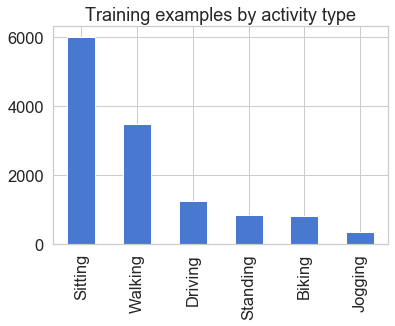

In [6]:
df['Activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [7]:
def plot_activity(activity, df):
    data = df[df['Activity'] == activity][['axis1','axis2','axis3']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

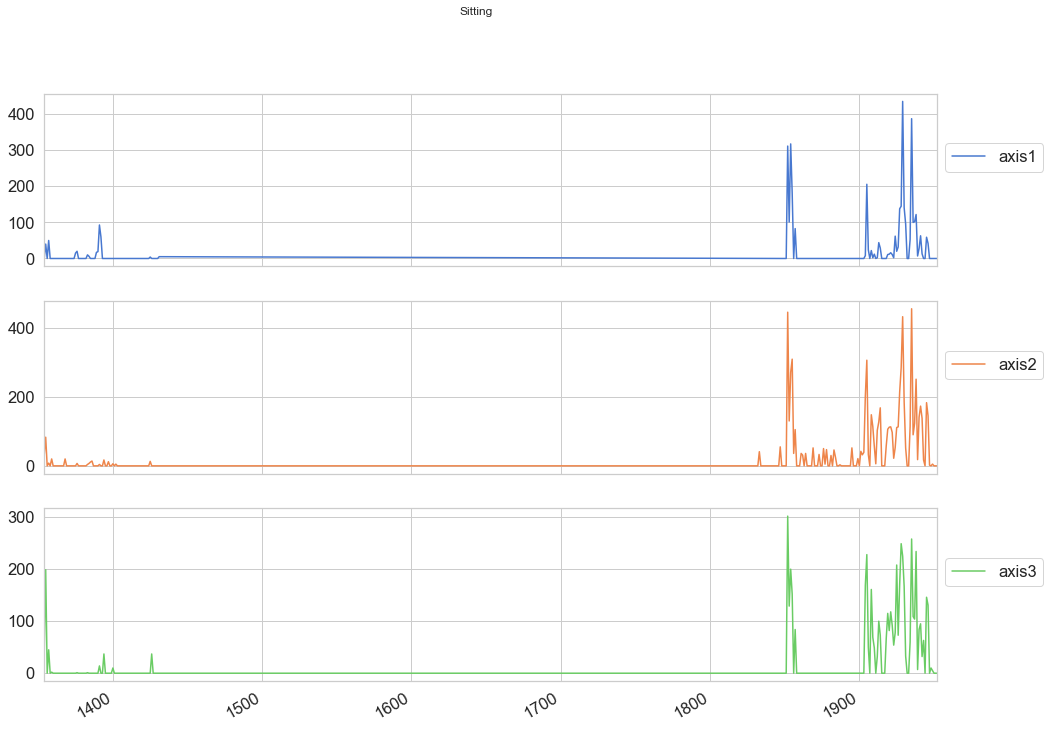

In [8]:
plot_activity("Sitting",df)

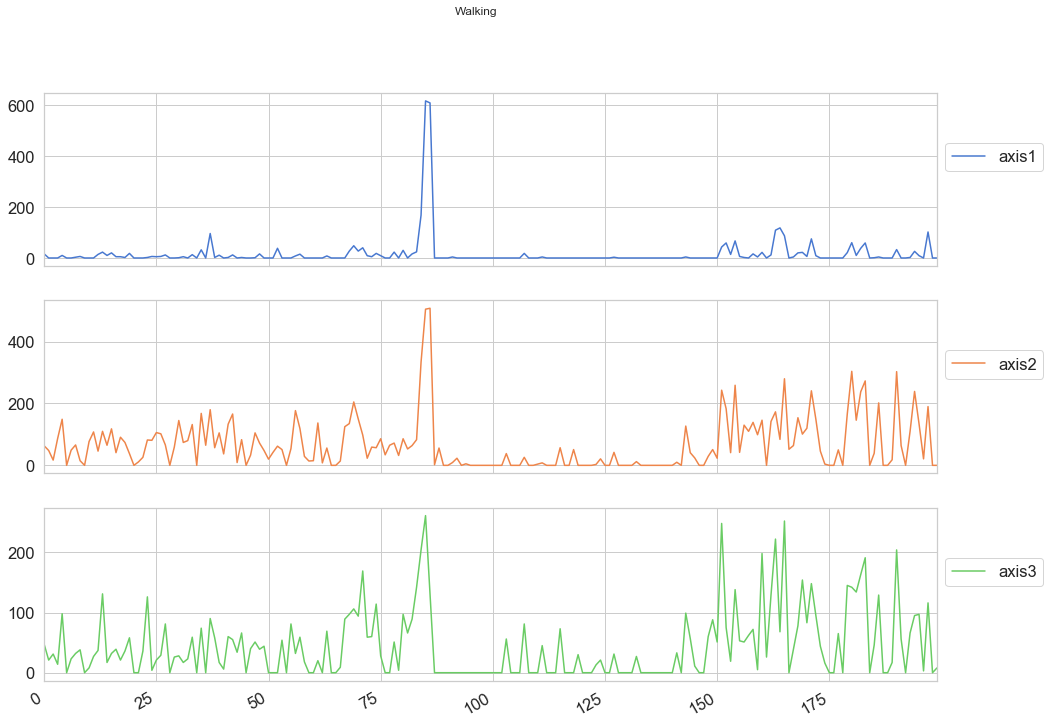

In [9]:
plot_activity("Walking",df)

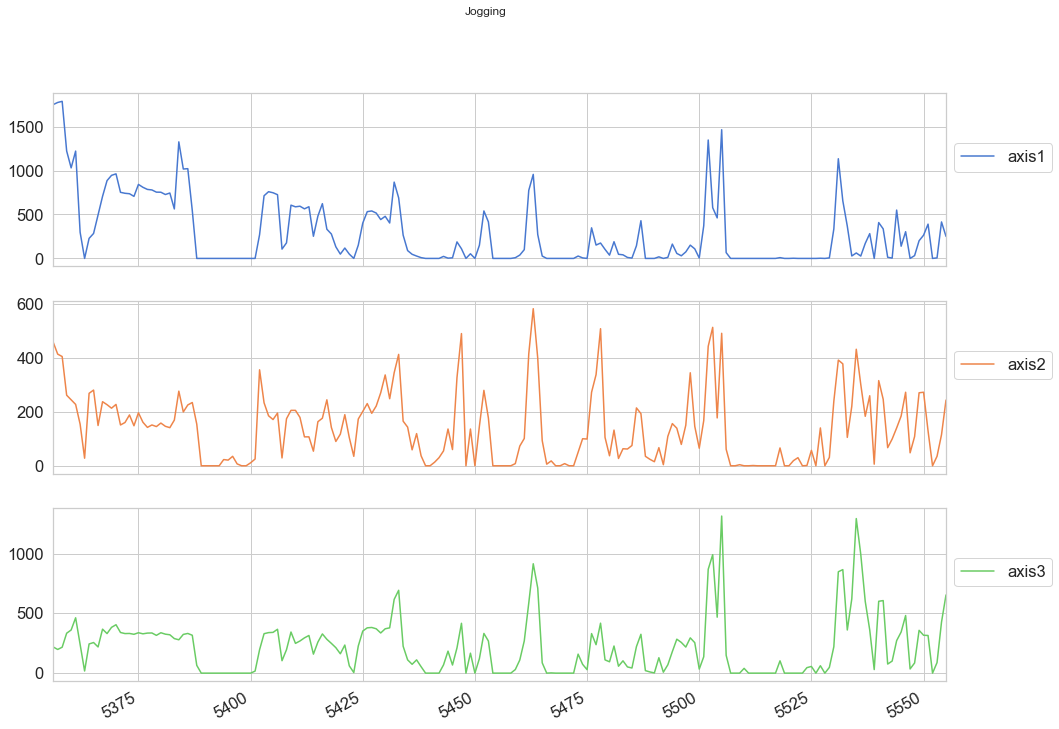

In [10]:
plot_activity("Jogging",df)

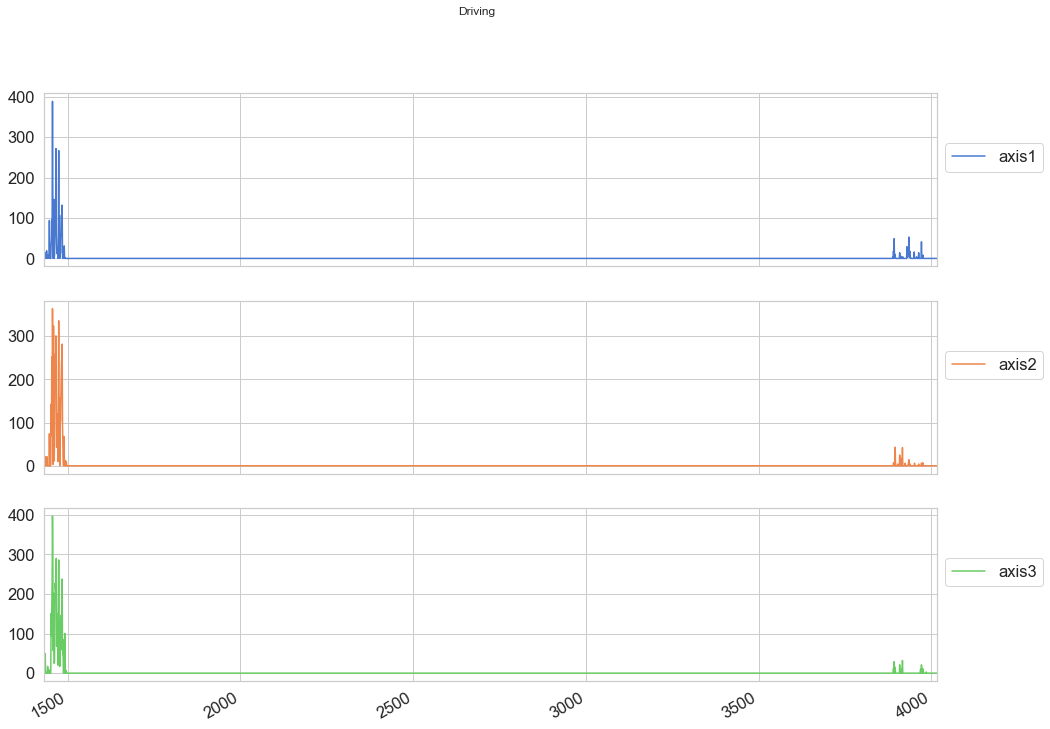

In [11]:
plot_activity("Driving",df)

In [12]:
def plot_speed(activity, df):
    data = df[df['Activity'] == activity][['SPEED']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

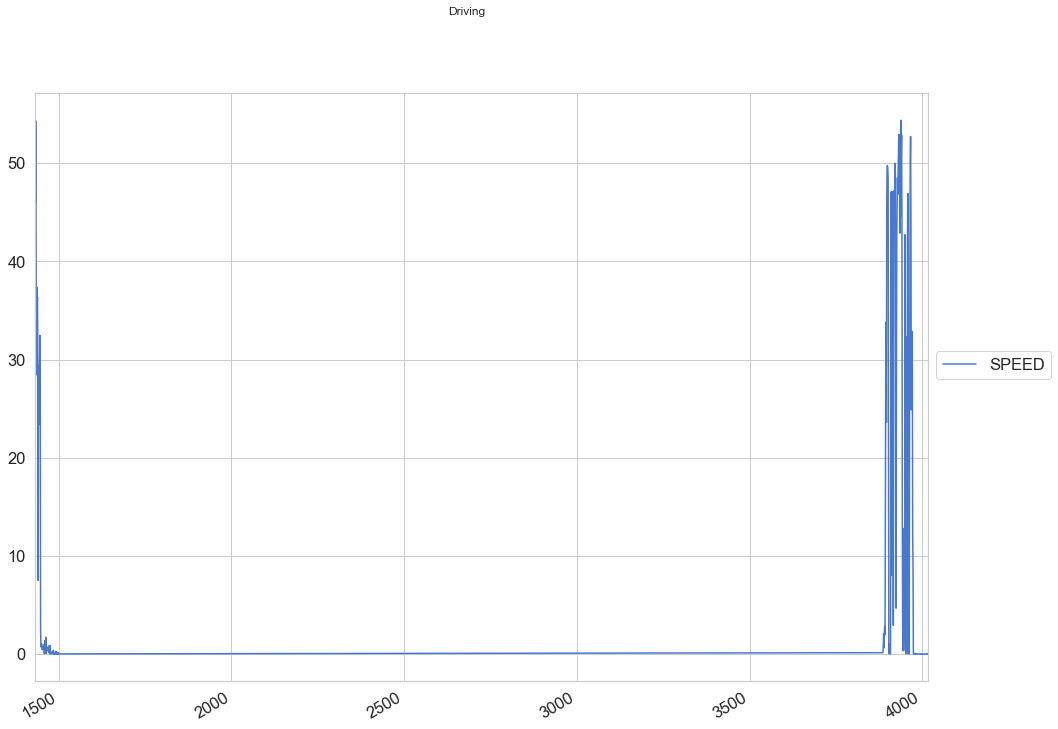

In [13]:
plot_speed("Driving",df)

In [14]:
#Features X
#df.drop returns a new dataframe with 
#our chosen column(s) dropped. 
X = np.array(df.drop(['Activity'], 1))
# Labels Y
#The labels, y, are just the class column.
y = np.array(df['Activity'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = sk.neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9862745098039216


In [16]:

                        # UnixTime	 LATITUDE	LONGITUDE	ALTITUDE	SPEED	 HEADING	 axis1 axis2 axis3 steps lux inclineOff inclineStanding inclineSitting   inclineLying   vm
Test_Driving = np.array([[1516638280,47.660593, 117.403837,566.468323,  24.23744, 35.066153,   227,  187,  286,    4,    0, 0,          10,             0,              0,             411]])
prediction = clf.predict(Test_Driving)
print(prediction)

['Driving']


In [17]:
                   #	1516400590	47.66112,-117.428948,555.082214,4.602755,94.090767,576,360,177,18,0,0,10,0,0,702
                         # UnixTime	 LATITUDE	LONGITUDE	ALTITUDE	SPEED	 HEADING	 axis1 axis2 axis3 steps lux inclineOff inclineStanding inclineSitting   inclineLying   vm
Test_Biking = np.array([[1516400590,47.66112,-117.428948,555.082214,4.602755,94.090767,576,360,177,18,0,0,10,0,0,702]])
prediction = clf.predict(Test_Biking)
print(prediction)

['Biking']


In [ ]:
# Testing Adding Labels to Unlabed CSV

In [27]:
#columns = ['TimeStamp','LOCAL DATE','LOCAL TIME','LATITUDE','N/S','LONGITUDE','E/W','ALTITUDE','SPEED','HEADING','axis1','axis2','axis3','steps','lux','inclineOff','inclineStanding','inclineSitting','inclineLying','vm']
labelTest = pd.read_csv('UnlabeledTest.csv')
labelTest = labelTest.dropna()
labelTest = labelTest.replace({';':''}, regex=True)
labelTest.dropna(axis=0, how='any', inplace=True)
labelTest.drop(["TimeStamp"], axis = 1, inplace = True) 
labelTest.drop(["N/S"], axis = 1, inplace = True) 
labelTest.drop(["E/W"], axis = 1, inplace = True) 

labelTest.head()

,UnixTime,LATITUDE,LONGITUDE,ALTITUDE,SPEED,HEADING,axis1,axis2,axis3,steps,lux,inclineOff,inclineStanding,inclineSitting,inclineLying,vm
0,1516391370,47.658951,-117.405619,150.020905,0.511703,350.754628,16,63,47,2,0,0,5,5,0,81
1,1516391380,47.661562,-117.406250,554.857056,0.362232,150.871007,0,48,21,0,0,0,5,5,0,53
2,1516391390,47.661484,-117.406185,554.637207,0.481599,135.057770,0,17,31,0,0,0,10,0,0,36
3,1516391400,47.661468,-117.406162,556.567566,0.626974,38.221800,0,87,14,0,0,0,10,0,0,89
4,1516391410,47.661479,-117.406149,556.621094,0.633758,129.348915,10,149,98,2,0,0,8,2,0,179


In [28]:
label = clf.predict(labelTest)
#labelTest['Predicted Activity'] = label
labelTest.insert(0,"Predicted Activity",label,True)
labelTest.head()

export_csv = labelTest.to_csv('MagicLabeled.csv') #Don't forget to add '.csv' at the end of the path

In [ ]:
# Testing Data Without Sitting

In [20]:
#testDataFrame = df.drop(["Activity"], axis = 1, inplace = True) 
testDataFrame = df[df.Activity != 'Sitting']


In [22]:
testDataFrame.head()

,Activity,UnixTime,LATITUDE,LONGITUDE,ALTITUDE,SPEED,HEADING,axis1,axis2,axis3,steps,lux,inclineOff,inclineStanding,inclineSitting,inclineLying,vm
0,Walking,1516391370,47.658951,-117.405619,150.020905,0.511703,350.754628,16,63,47,2,0,0,5,5,0,81
1,Walking,1516391380,47.661562,-117.406250,554.857056,0.362232,150.871007,0,48,21,0,0,0,5,5,0,53
2,Walking,1516391390,47.661484,-117.406185,554.637207,0.481599,135.057770,0,17,31,0,0,0,10,0,0,36
3,Walking,1516391400,47.661468,-117.406162,556.567566,0.626974,38.221800,0,87,14,0,0,0,10,0,0,89
4,Walking,1516391410,47.661479,-117.406149,556.621094,0.633758,129.348915,10,149,98,2,0,0,8,2,0,179


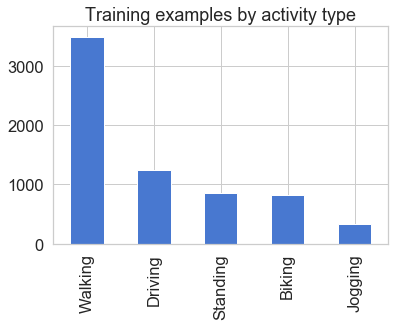

In [24]:
testDataFrame['Activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [23]:
#Features X
#df.drop returns a new dataframe with 
#our chosen column(s) dropped. 
X = np.array(testDataFrame.drop(['Activity'], 1))
# Labels Y
#The labels, y, are just the class column.
y = np.array(testDataFrame['Activity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = sk.neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9933135215453195


In [27]:
# Testing Without Sitting Data
# -------------testDataFrame------------------
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X = np.array(testDataFrame.drop(['Activity'], 1))
#Labels Y
#The labels, y, are just the class column.
y = np.array(testDataFrame['Activity'])
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Compare Machine Learning Algo
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.522767 (0.000670)
KNN: 0.993497 (0.004565)
CART: 0.985882 (0.004303)
NB: 0.453457 (0.020361)
SVM: 0.522767 (0.000670)


In [27]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

# Compare Machine Learning Algo
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.473277 (0.000471)
KNN: 0.990686 (0.003253)
CART: 0.989312 (0.002851)
NB: 0.449053 (0.011992)
SVM: 0.473277 (0.000471)


In [32]:
# Feature Selection

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Activity']= label_encoder.fit_transform(df['Activity']) 
  
df['Activity'].unique() 


array([5, 0, 3, 1, 4, 2], dtype=int64)

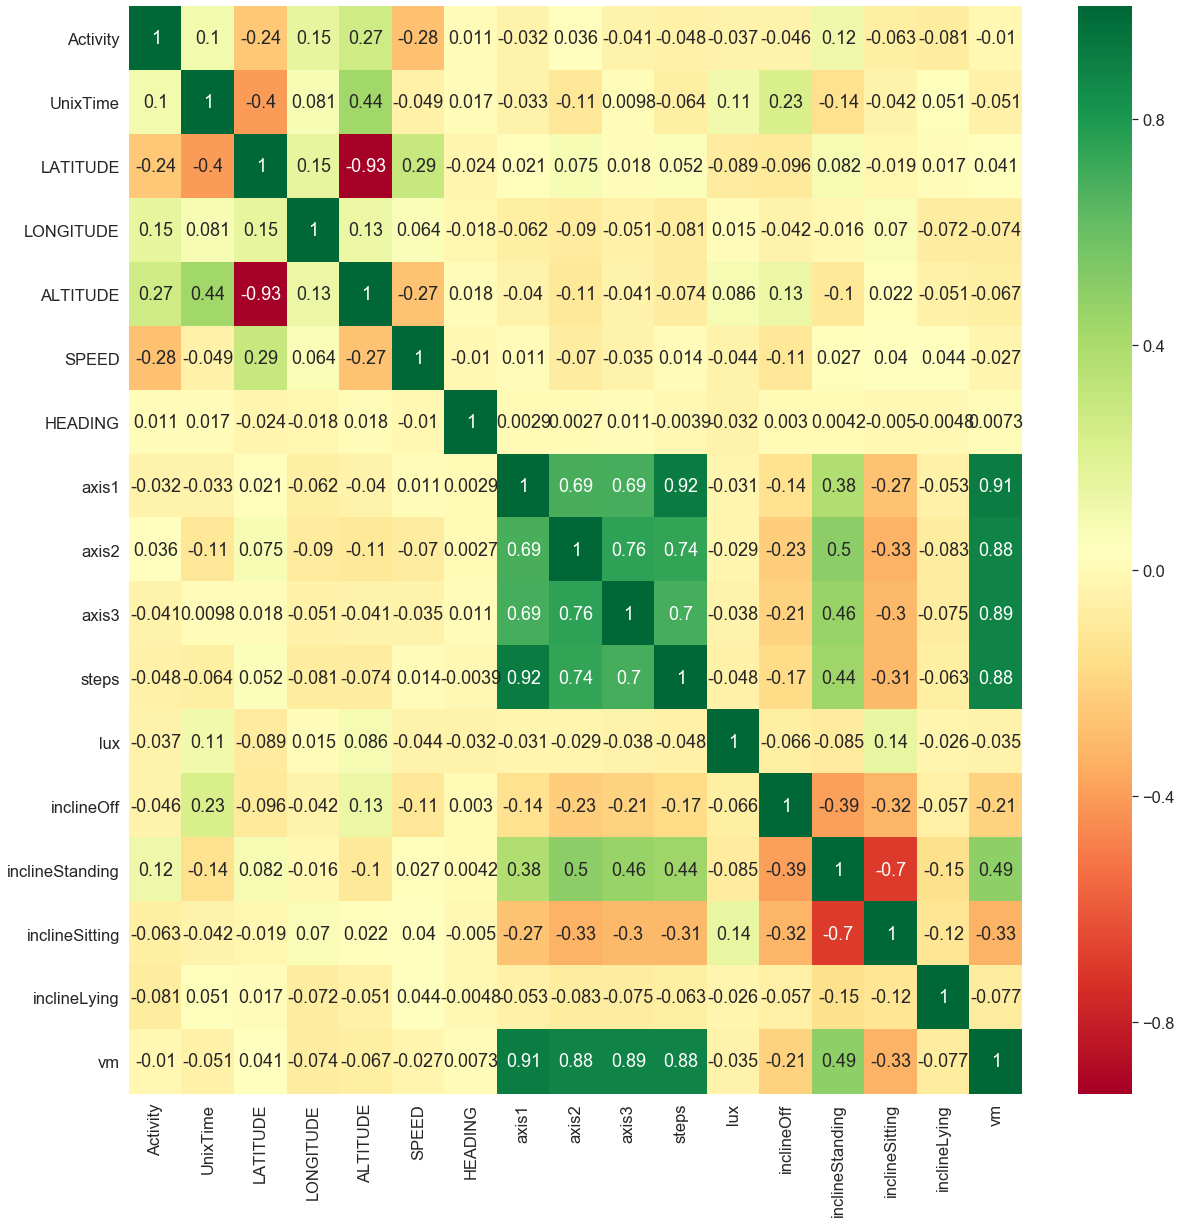

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

Feature_X = df.iloc[:,0:16]  #independent columns
Feature_Y = df.iloc[:,-1]    #target column i.e activity

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")